In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from scipy.optimize import fsolve
from Finite_volume_method_1D import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 200,
})

In [62]:
datapath = '../../DataKian/bTa_LT278W2chip5/673nm/'#'../../DataKian/Al_LT165chip7_run2/673nm/'#
data = np.genfromtxt(datapath+'KID7_109dBm__TmK100_avgpulse_ampphase.csv',skip_header=1,delimiter=',')

140


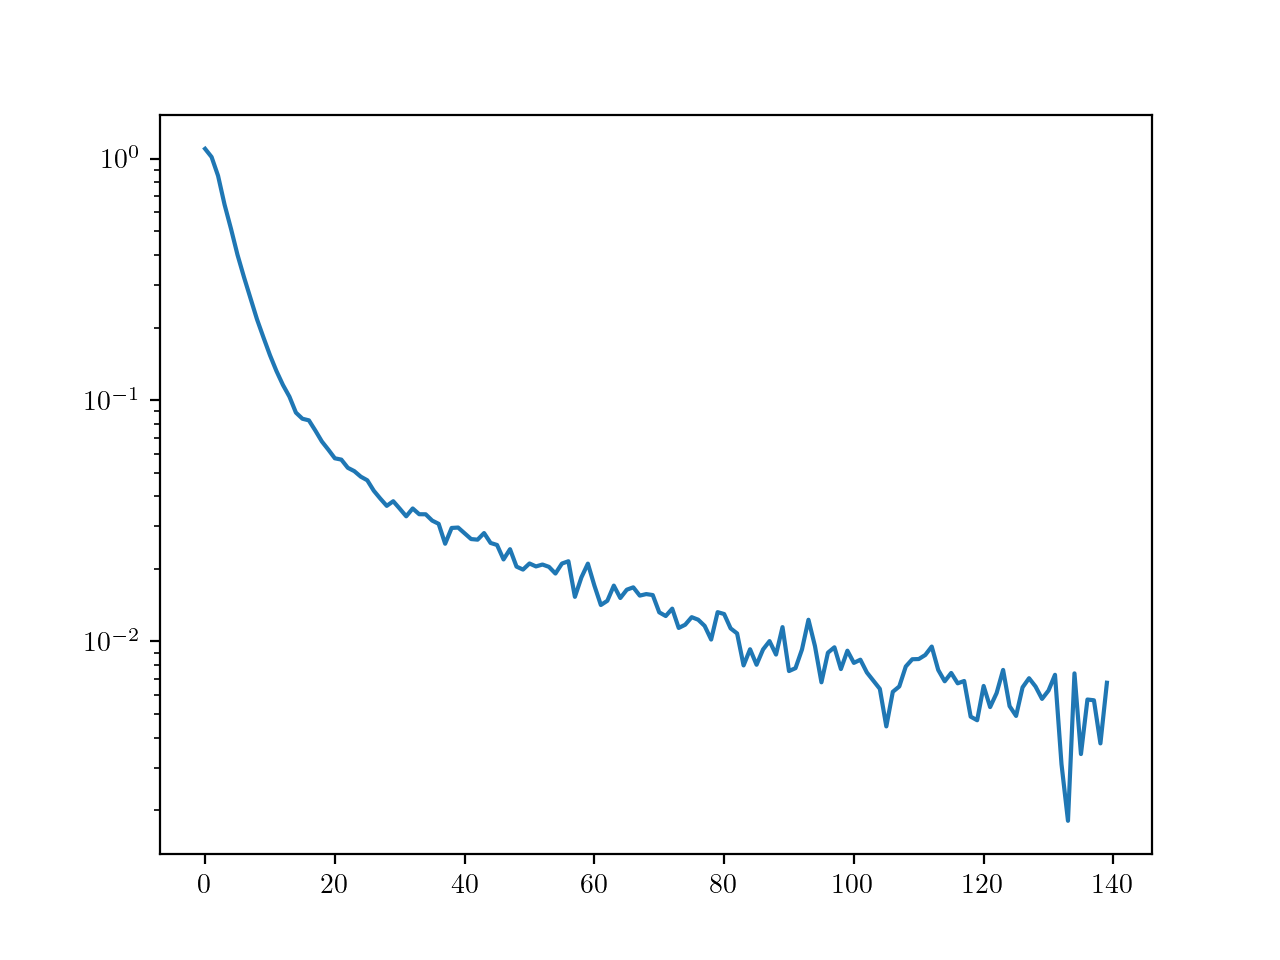

In [72]:
# Shift to align data, select phase
phase = data[100:,2] #100: for bTa, 500: for Al

ref = phase[0]
for i in range(len(phase))[::20]:
    if ref - phase[i] < 0:
        print(i)
        phase = phase[:i]
        break
    ref = phase[i]

plt.clf()
plt.semilogy(phase)
plt.show()

In [ ]:
# Parameters Al, photon@673nm

lambda_ph = 0.673 #um
h= 4.1356e-12 #eV us
c = 299792458 #um/us
k_B = 0.00008617343 # eV/K
eta_pb = 0.57 # 0.57 maximum
E_ph = h*c/lambda_ph
T_c = 0.8
Delta = 1.764*k_B*T_c
N_init = eta_pb*E_ph/Delta

R=12e-6
Q0=104.15
D_all=15000
sigma_init=1

In [ ]:
# define geometry
dt=0.1
dx=0.5
L=310 # make sure dx cleanly divides L
N=int(L/dx)
x_borders=np.linspace(-L/2,L/2,N,endpoint=True)
x_centers=np.linspace(-L/2+dx,L/2-dx,N-1,endpoint=True)
D=np.ones_like(x_borders)*D_all

# IC
Q_init = np.exp(-0.5*(x_centers/sigma_init)**2)*N_init/(sigma_init*np.sqrt(2*np.pi))
print(np.sum(Q_init)*dx)

# Simulation
T=len(phase)
t_axis_Al = np.arange(0,T+dt,dt)
Q_list_Al = simulate(Q_init,int(T/dt),dt,dx,D_all,R,Q0,method='CrankNicolson')

In [ ]:
# Theory: thomas' 1/t oplossing

def decay(A,R,Q0,t):
  return 2*Q0/((2*Q0/A+1)*np.exp(2*Q0*R*t)-1)

t_range = np.arange(len(phase))
theory = decay(N_init,R,Q0,t_range)

In [ ]:
plt.semilogy(phase_Al,label='Al',color='b')
plt.semilogy(theory,label='Theory',color='r')
plt.xlabel(r'time $t$ ($\mu s$)')
plt.ylabel(r'phase $\theta$ (normd.)')
plt.legend()